<a href="https://colab.research.google.com/github/kgudalewski/sex_ethnicity_age_classification/blob/main/sex_ethnicity_age_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("age_gender.csv")

In [3]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
df.drop('img_name', axis=1, inplace=True)

In [5]:
df.shape

(23705, 4)

In [6]:
df.isnull().sum()

age          0
ethnicity    0
gender       0
pixels       0
dtype: int64

In [7]:
df['age'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64

In [8]:
df['ethnicity'].value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

In [9]:
df['gender'].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [10]:
columns = ["age", "gender", "ethnicity"]
y = df.drop("pixels", axis=1)
X = df.drop(columns, axis=1)

In [11]:
X.head()

,pixels
0,129 128 128 126 127 130 133 135 139 142 145 14...
1,164 74 111 168 169 171 175 182 184 188 193 199...
2,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,193 197 198 200 199 200 202 203 204 205 208 21...
4,202 205 209 210 209 209 210 211 212 214 218 21...


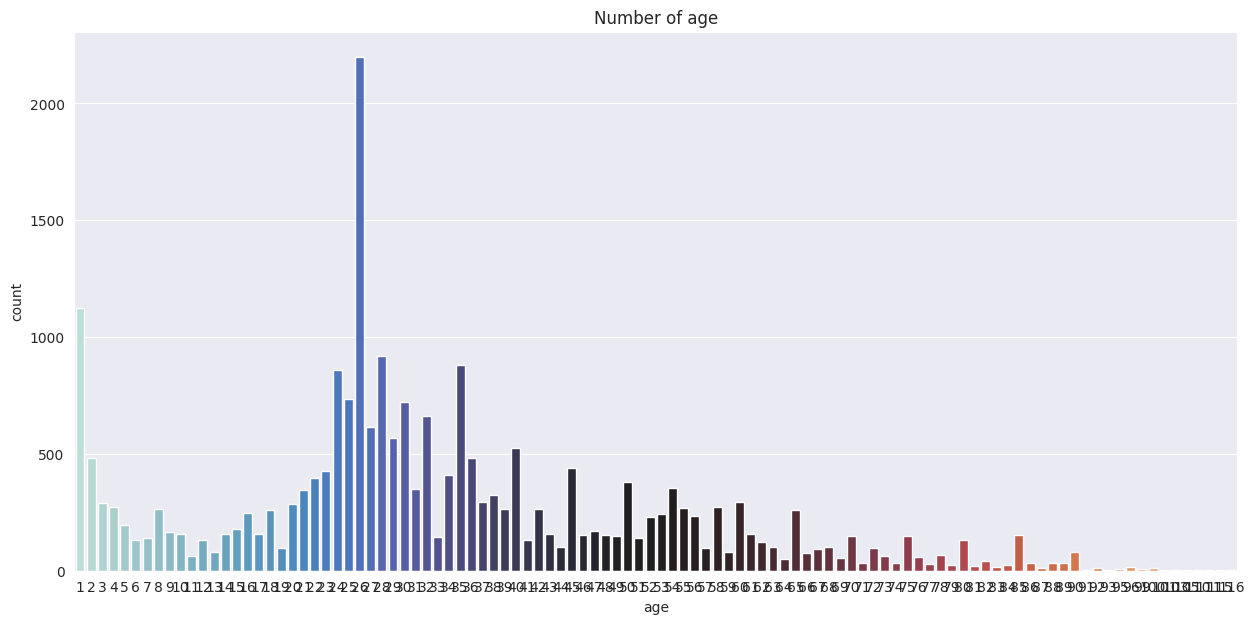

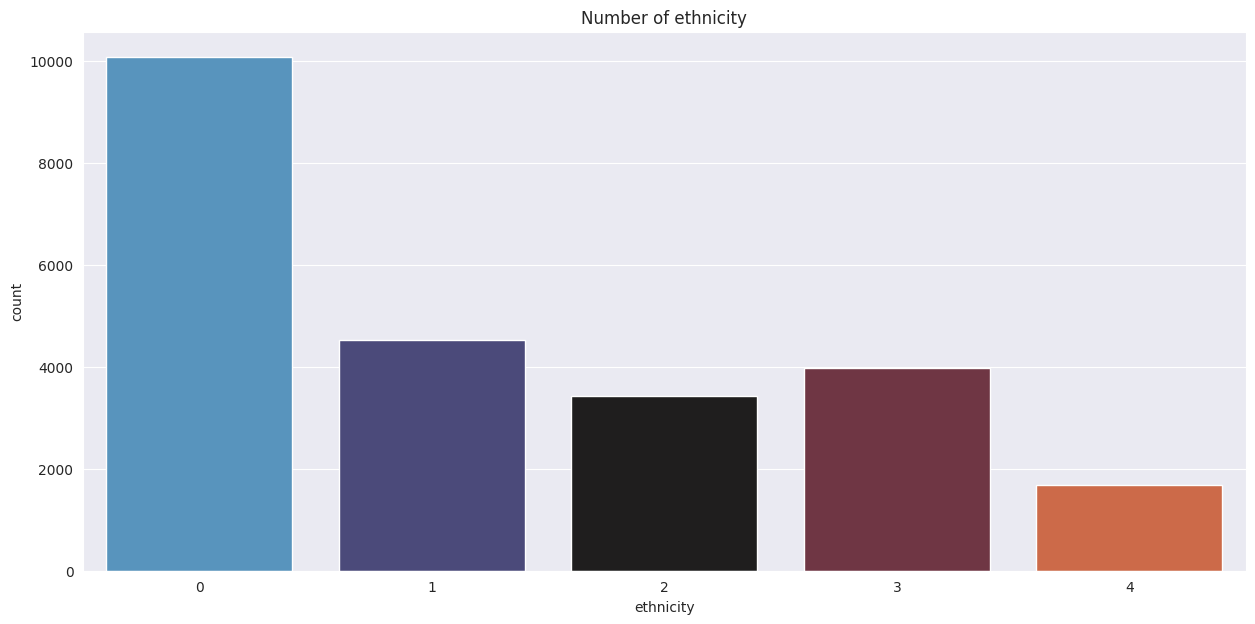

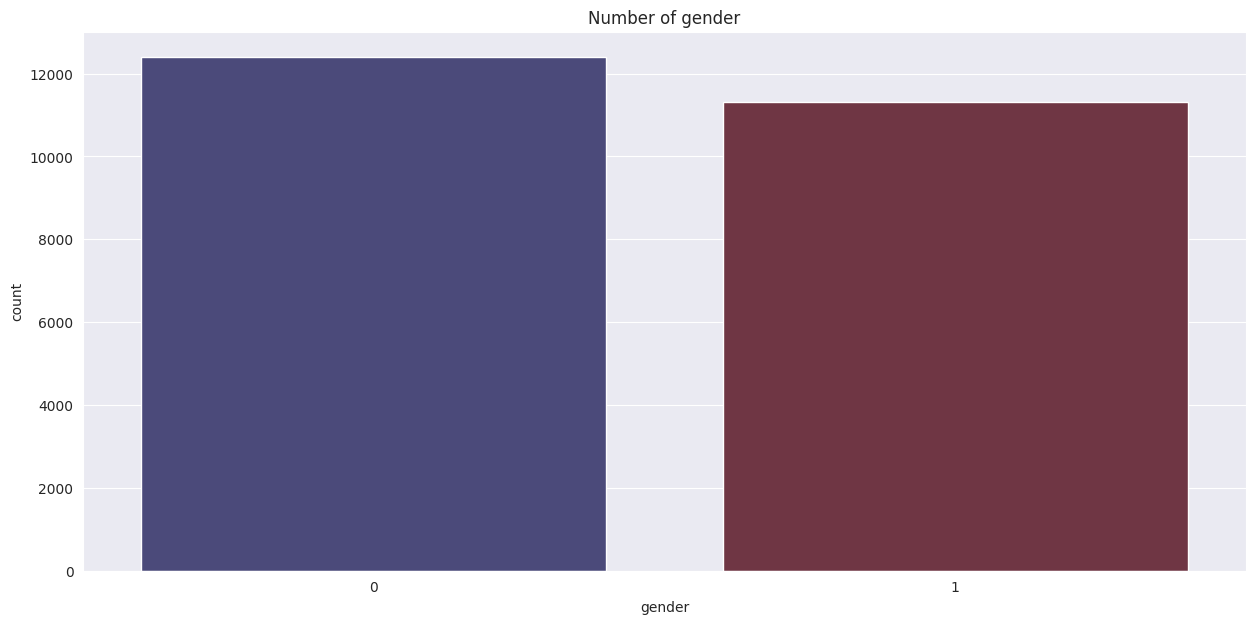

In [12]:
for i in y.columns:
    plt.figure(figsize=(15,7))
    g = sns.countplot(x = y[i], palette="icefire")
    plt.title(f"Number of {i}")

Text(0.5, 1.0, 'Number of age')

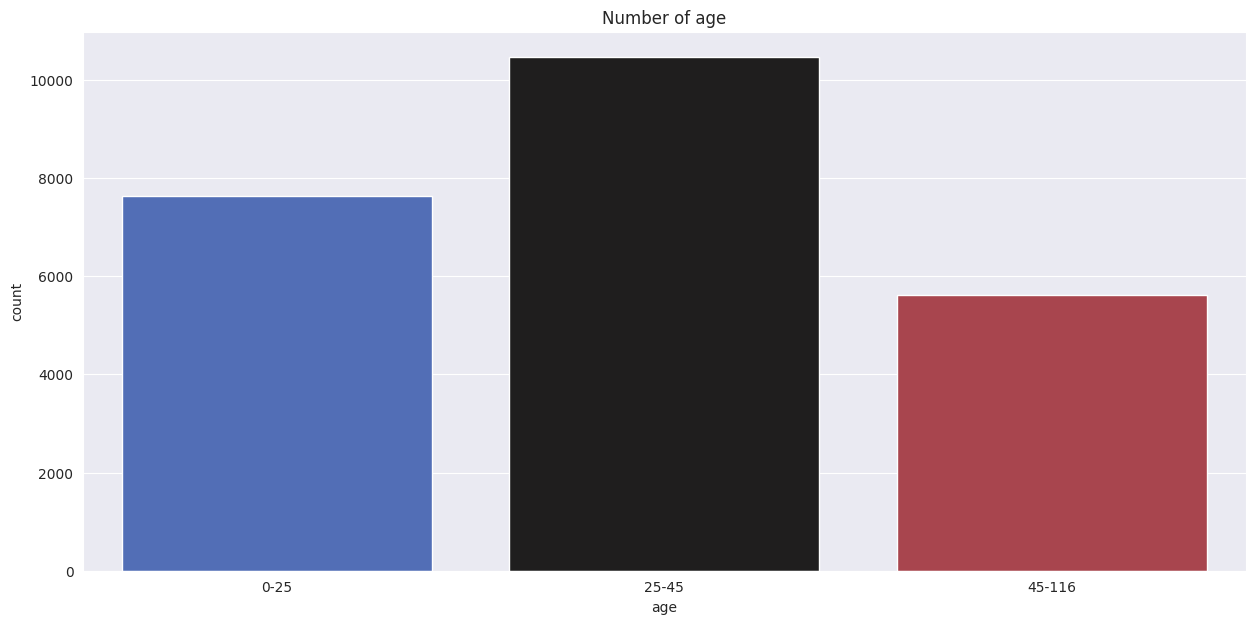

In [13]:
y["age"] = pd.cut(y["age"],bins=[0,25,45,116],labels=["0-25","25-45","45-116"])
plt.figure(figsize=(15,7))
g = sns.countplot(x = y["age"], palette="icefire")
plt.title("Number of age")

<Axes: xlabel='ethnicity', ylabel='count'>

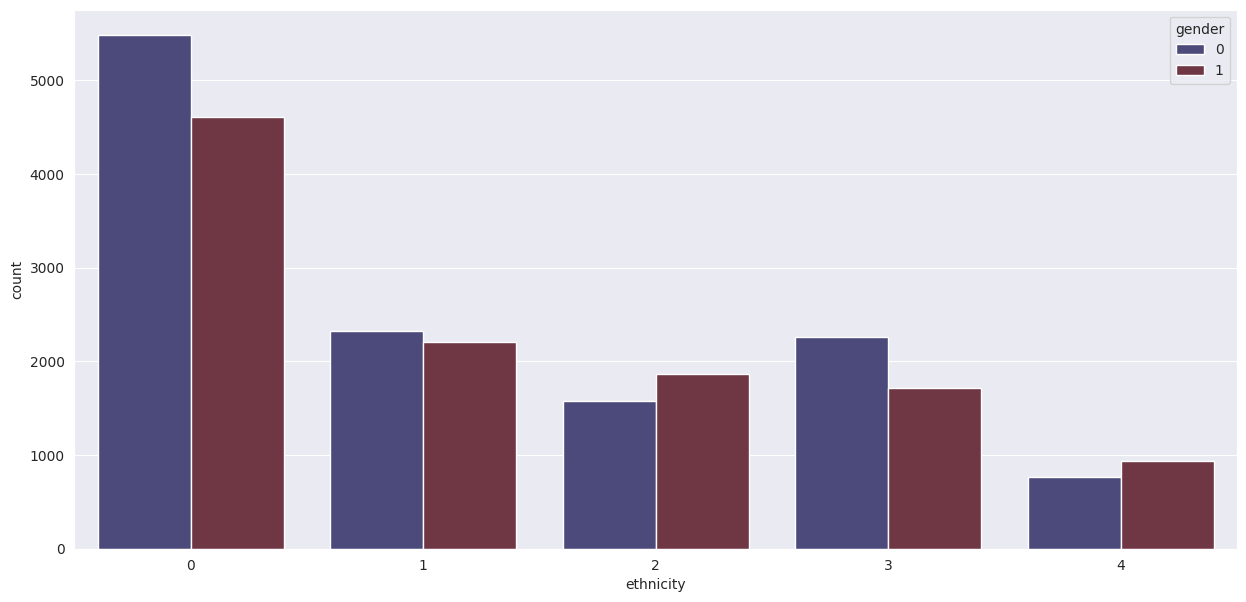

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(data=y, x="ethnicity", hue="gender", palette="icefire")

<Axes: xlabel='age', ylabel='count'>

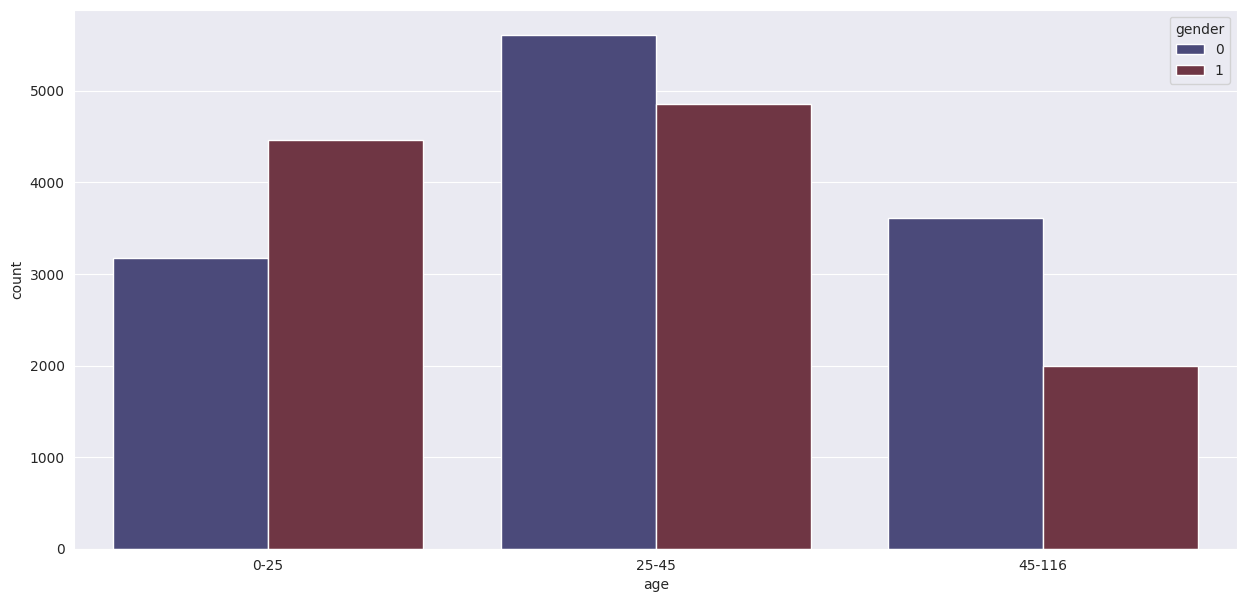

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(data=y, x="age", hue="gender", palette="icefire")

<Axes: xlabel='ethnicity', ylabel='count'>

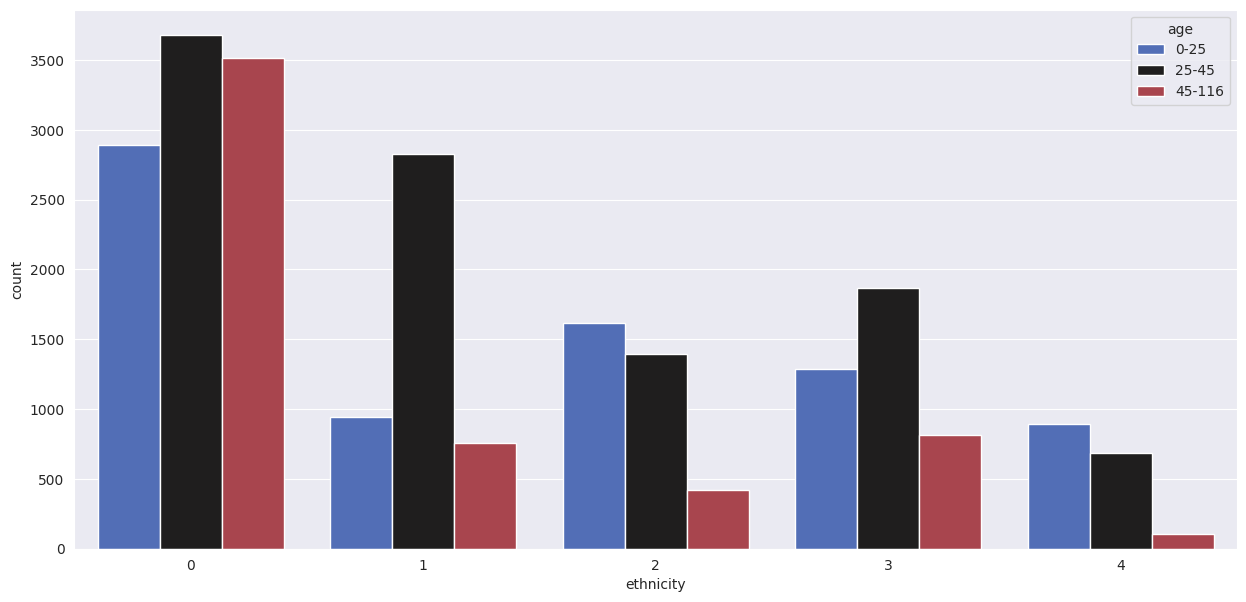

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(data=y, x="ethnicity", hue="age", palette="icefire")

In [17]:
len(X["pixels"][0].split(" "))

2304

In [18]:
np.sqrt(len(X["pixels"][0].split(" "))) # 48 x 48 = 2304 pixels

48.0

In [19]:
X = (
    X['pixels'].str.split(' ', expand=True)
        .astype(int).to_numpy()
        .reshape((23705, 48, 48, 1))
)

In [20]:
from sklearn.model_selection import train_test_split

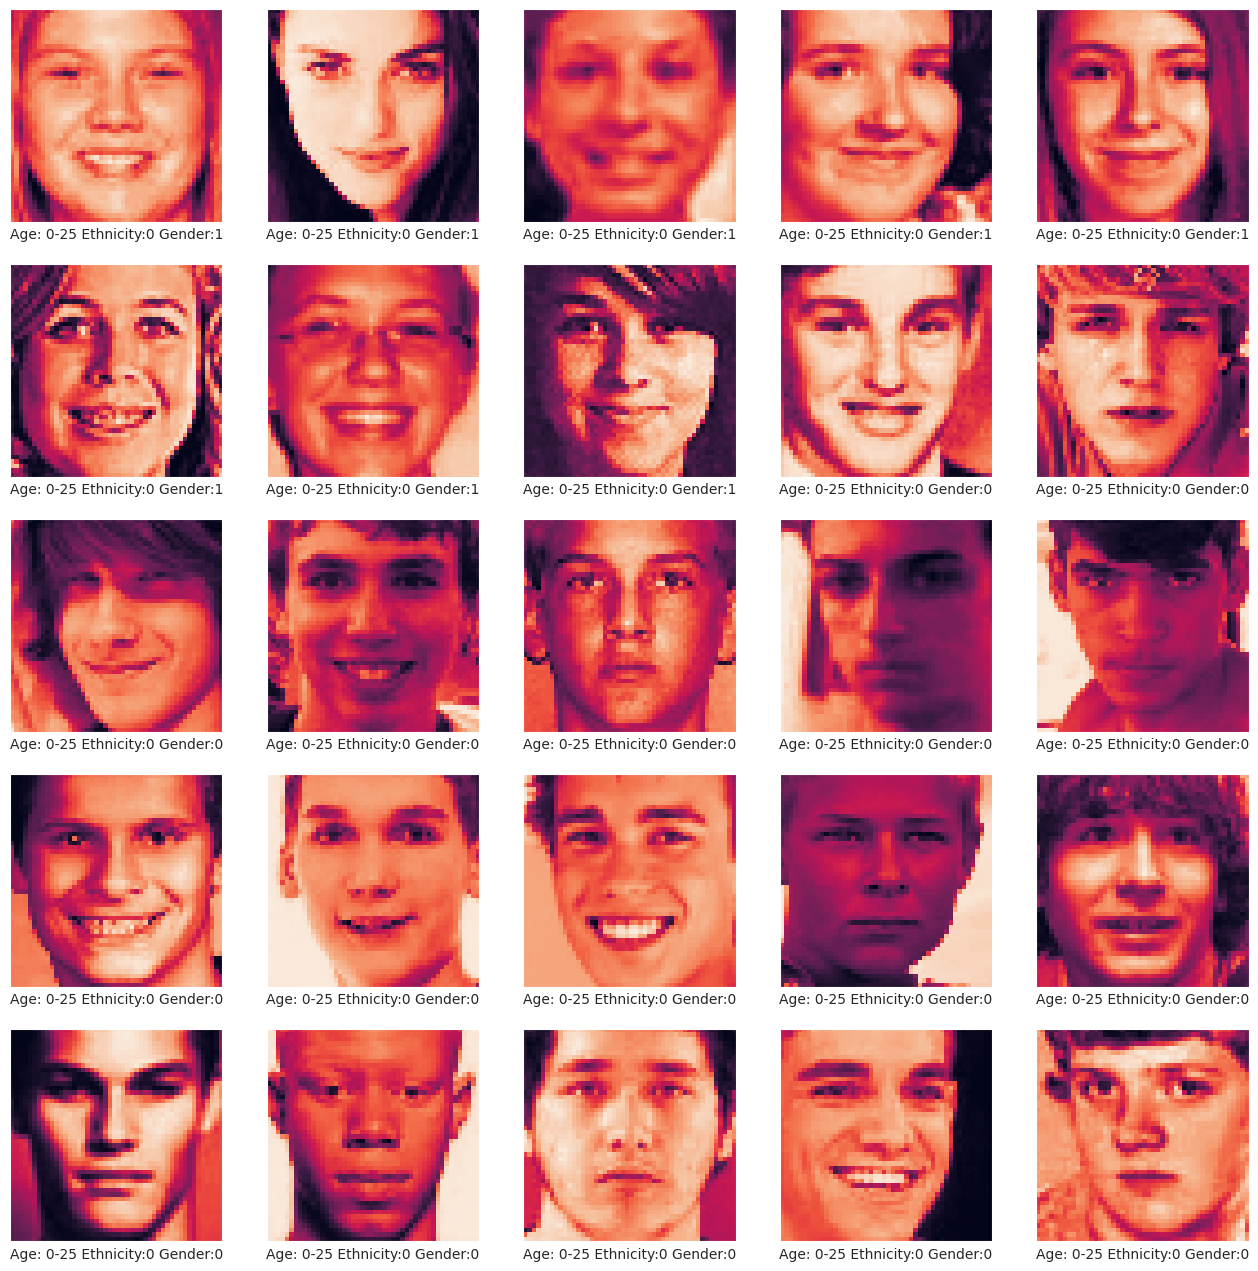

In [21]:
plt.figure(figsize=(16,16))
for i,a in zip(df.loc[df.ethnicity == 0].index.to_list()[1000:1026], range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(
    "Age: "+str(y['age'].iloc[i])+
    " Ethnicity:"+str(y['ethnicity'].iloc[i])+
    " Gender:"+str(y['gender'].iloc[i]))
plt.show()

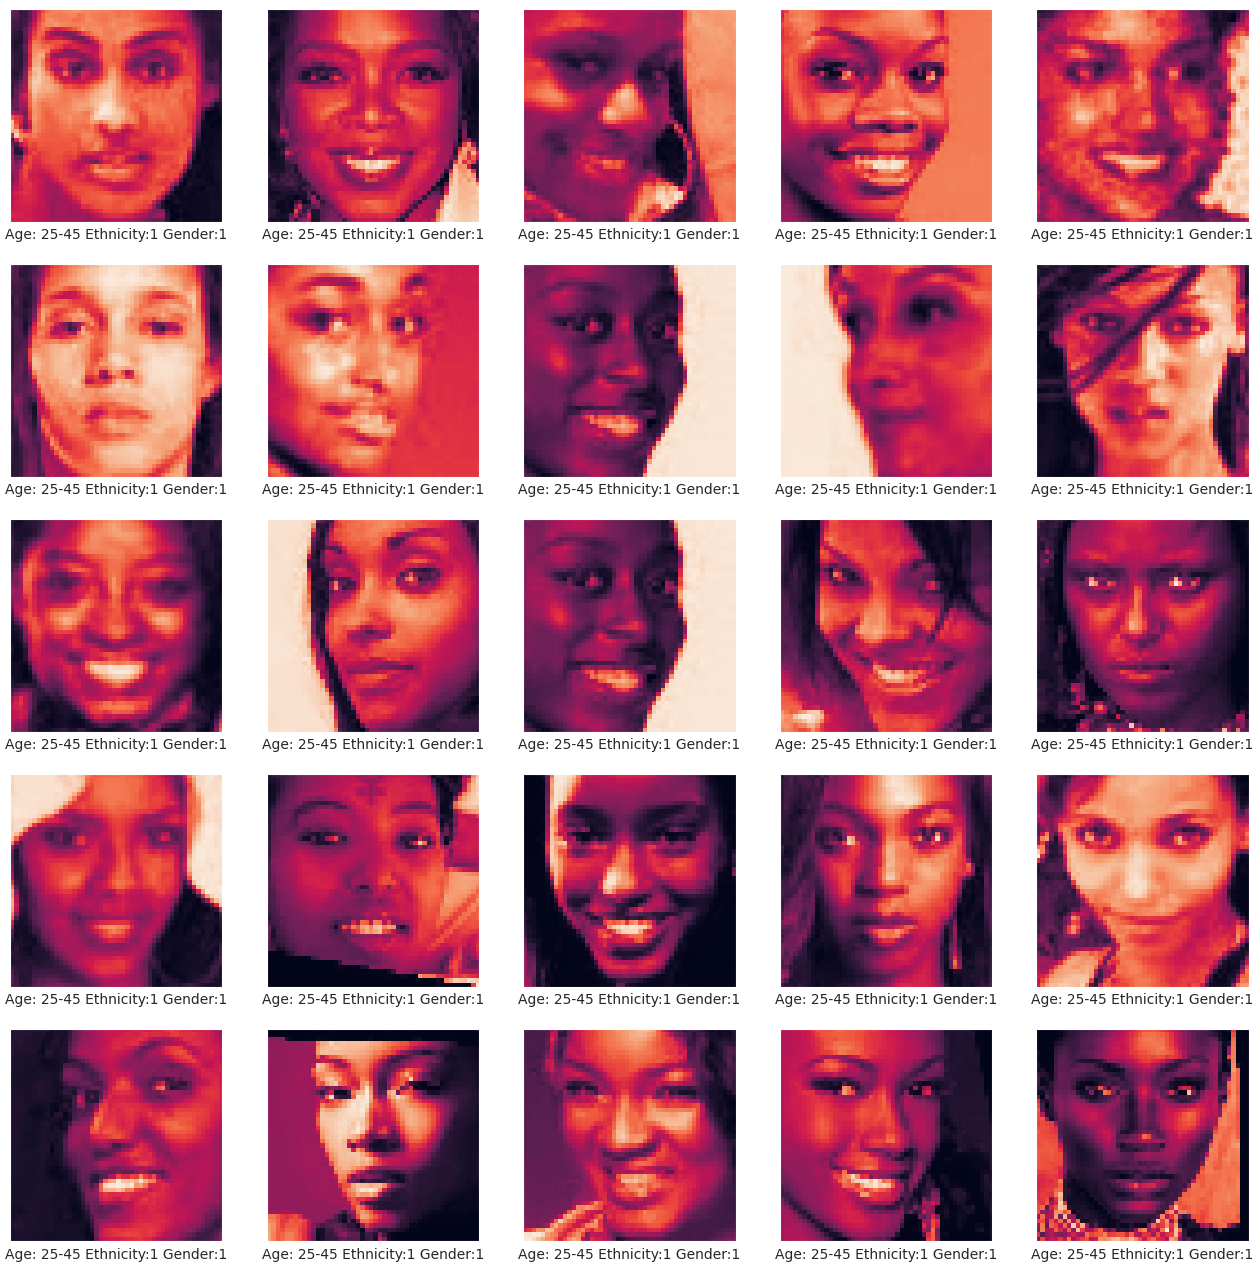

In [22]:
plt.figure(figsize=(16,16))
for i,a in zip(df.loc[df.ethnicity == 1].index.to_list()[1000:1026], range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(
    "Age: "+str(y['age'].iloc[i])+
    " Ethnicity:"+str(y['ethnicity'].iloc[i])+
    " Gender:"+str(y['gender'].iloc[i]))
plt.show()

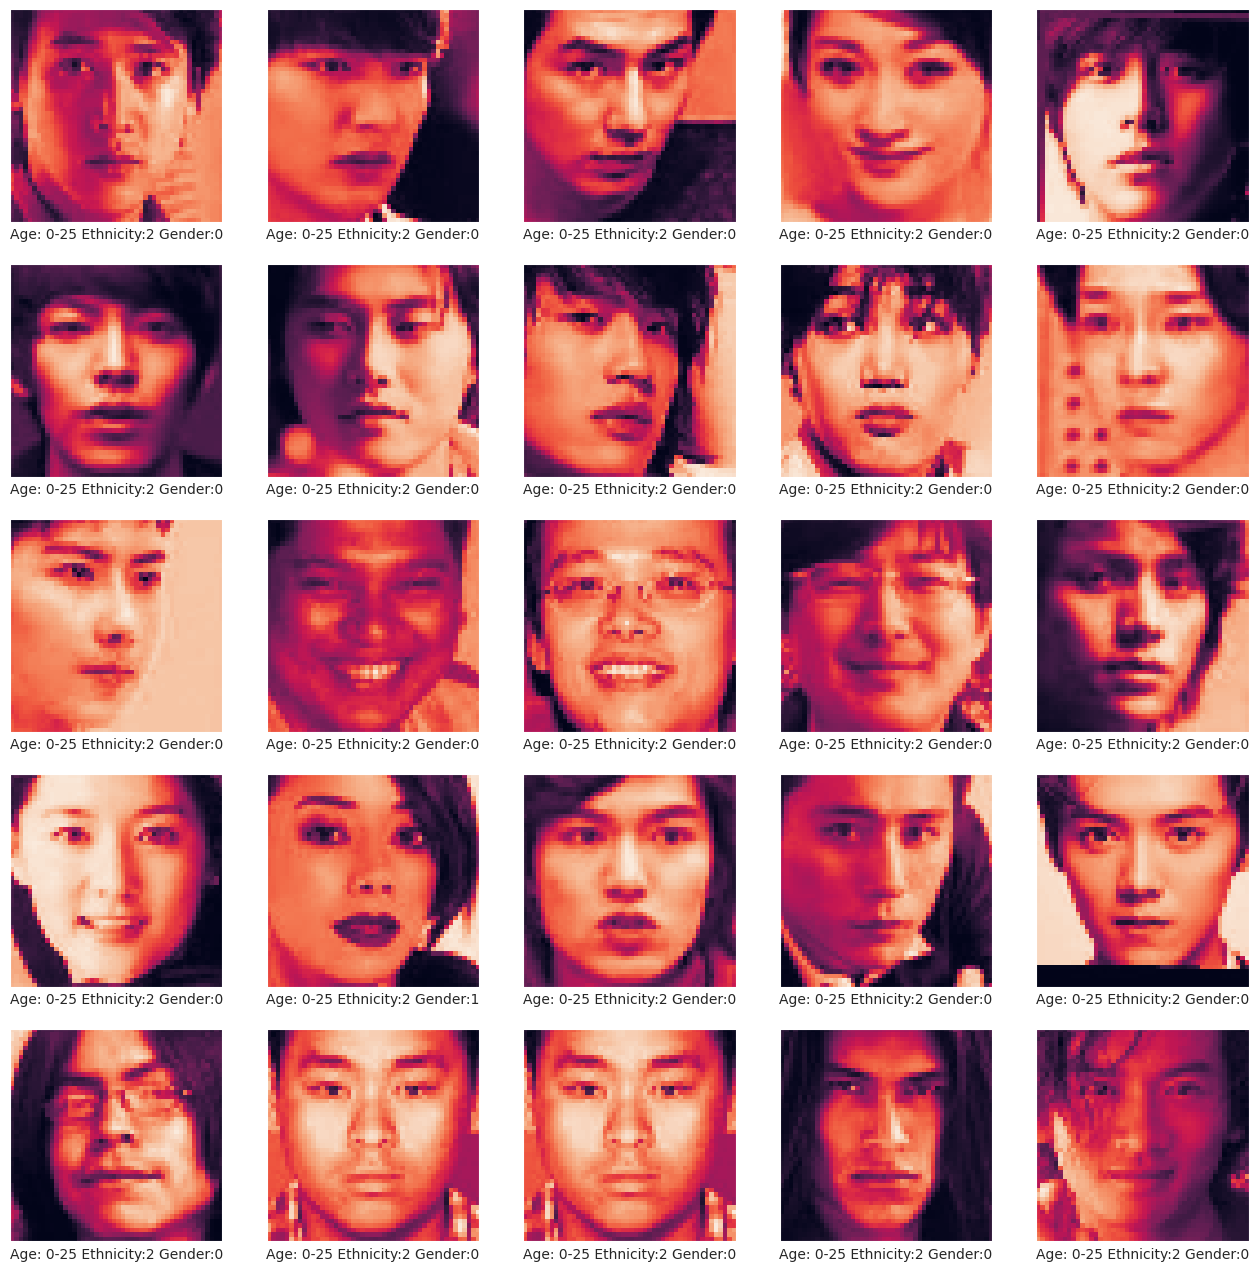

In [23]:
plt.figure(figsize=(16,16))
for i,a in zip(df.loc[df.ethnicity == 2].index.to_list()[1000:1026], range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(
    "Age: "+str(y['age'].iloc[i])+
    " Ethnicity:"+str(y['ethnicity'].iloc[i])+
    " Gender:"+str(y['gender'].iloc[i]))
plt.show()

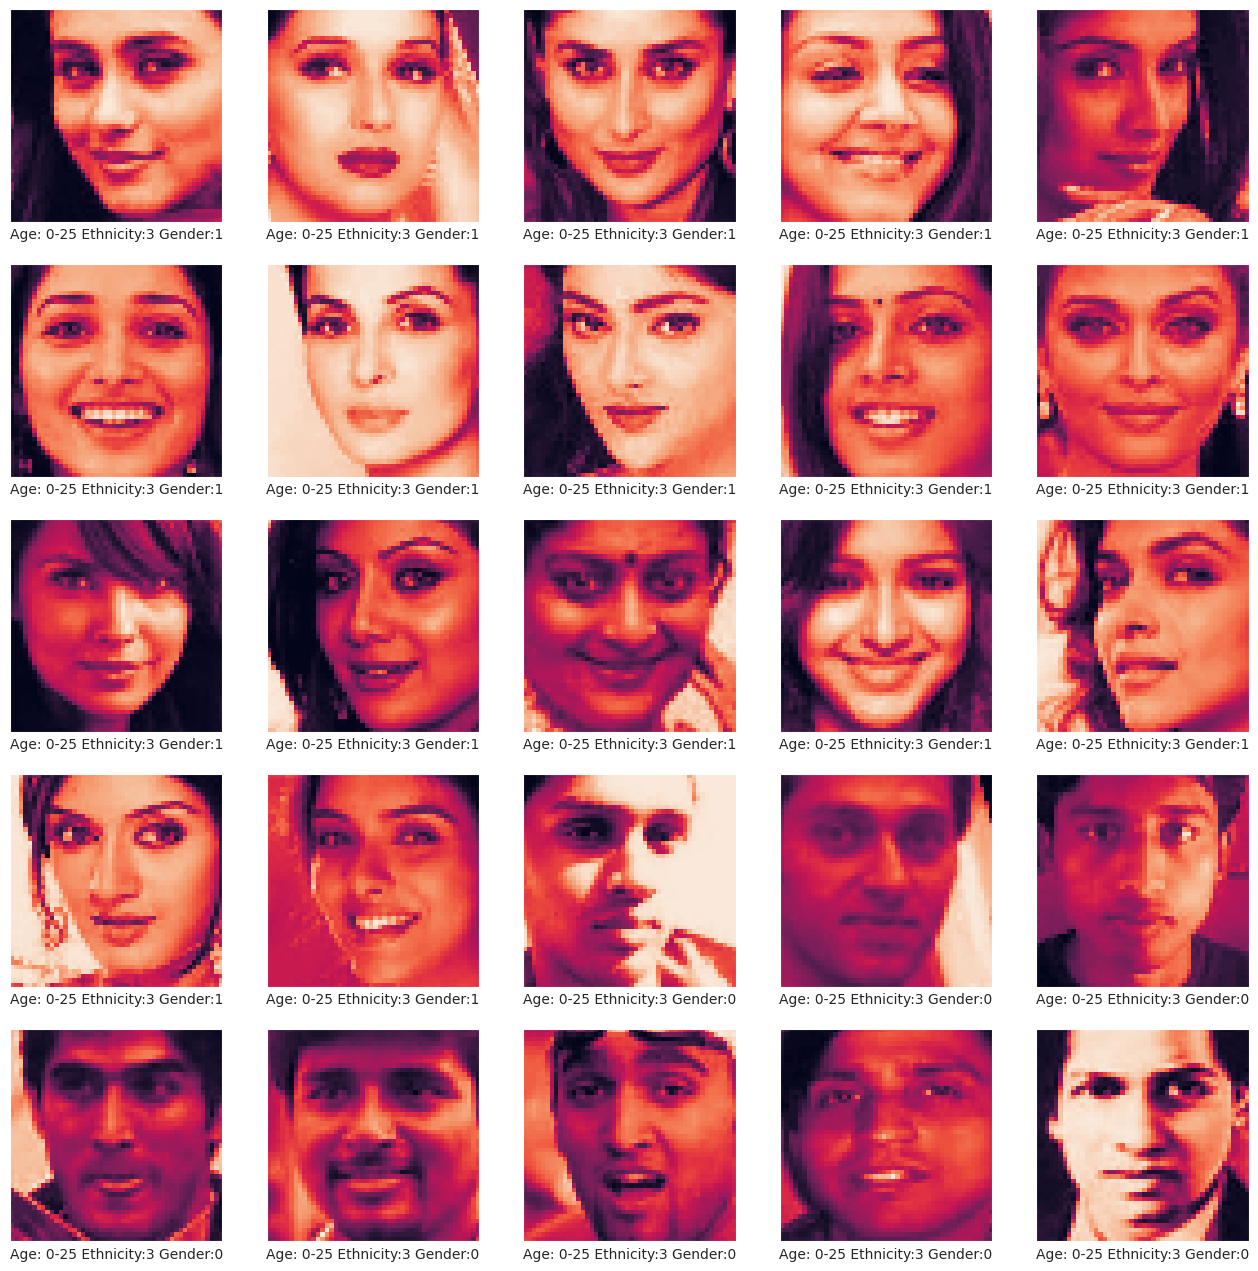

In [24]:
plt.figure(figsize=(16,16))
for i,a in zip(df.loc[df.ethnicity == 3].index.to_list()[1000:1026], range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(
    "Age: "+str(y['age'].iloc[i])+
    " Ethnicity:"+str(y['ethnicity'].iloc[i])+
    " Gender:"+str(y['gender'].iloc[i]))
plt.show()

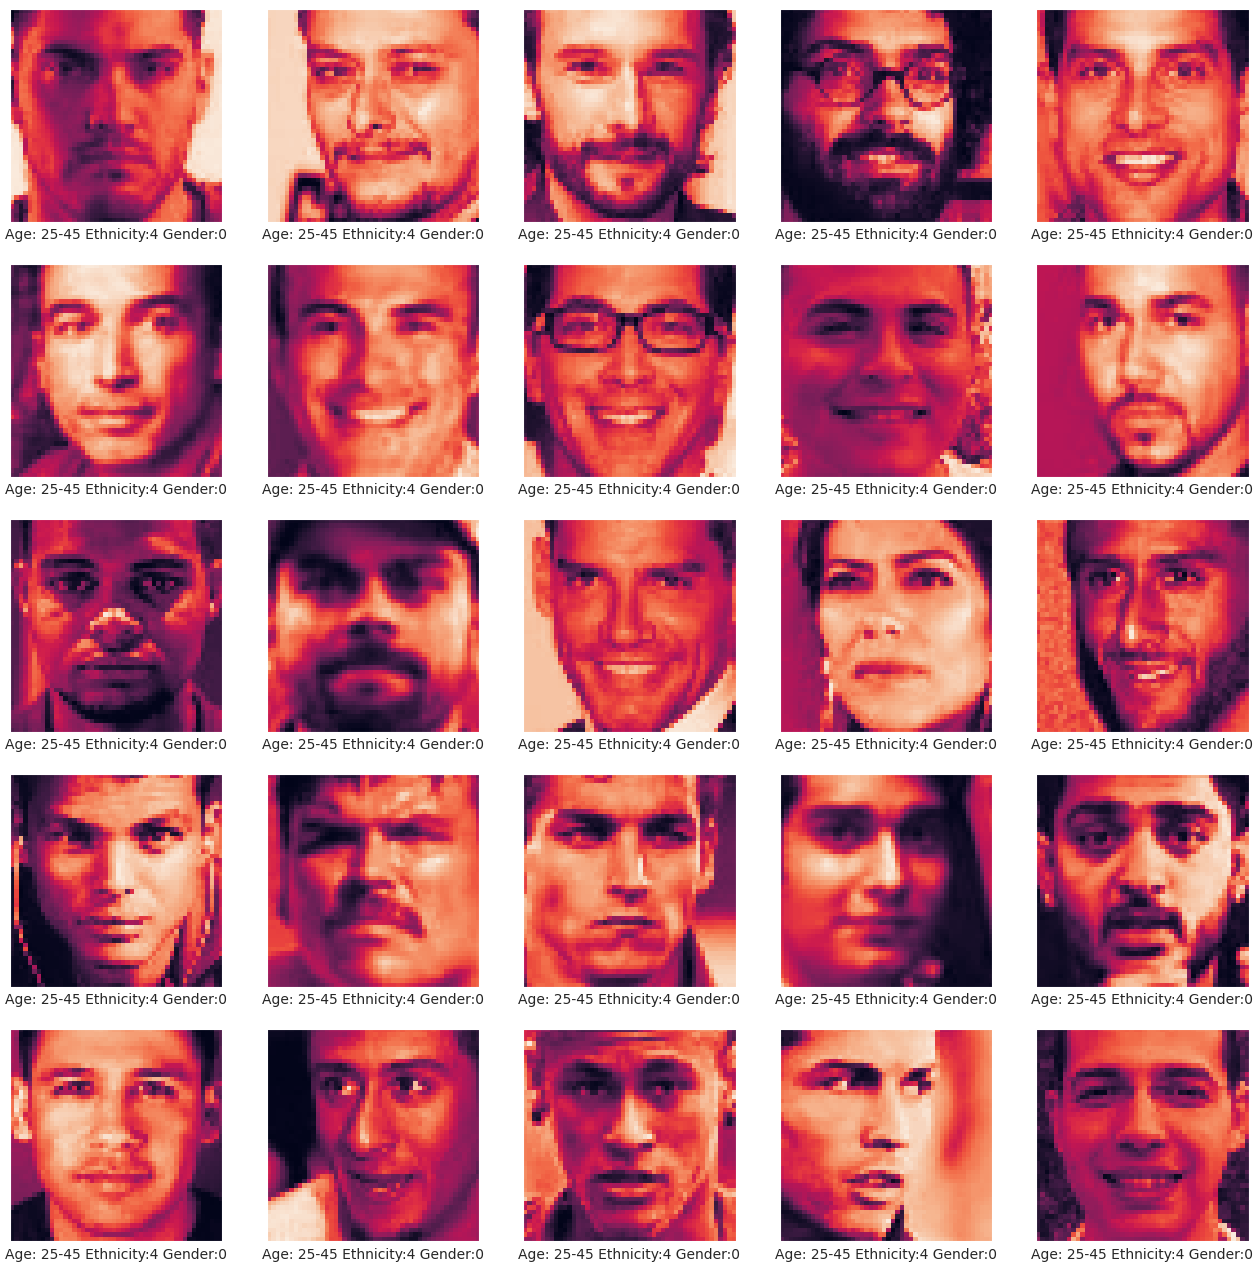

In [25]:
plt.figure(figsize=(16,16))
for i,a in zip(df.loc[df.ethnicity == 4].index.to_list()[1000:1026], range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(
    "Age: "+str(y['age'].iloc[i])+
    " Ethnicity:"+str(y['ethnicity'].iloc[i])+
    " Gender:"+str(y['gender'].iloc[i]))
plt.show()

In [26]:
y.ethnicity = y.ethnicity.replace([0,1,2,3,4],["White","Black","Asian","Hindu","Latin"])
y.gender = y.gender.replace([0,1],["Male","Female"])
# y = pd.get_dummies(data=y, columns=['age', "ethnicity", "gender"])
# y = y.astype(float)

In [27]:
#TODO list of labels, each element of list is list of [age,ethnictity,gender]

labels = []

for idx in range(X.shape[0]):
  labels.append(list(y.loc[idx].values))
  
print(labels[:10])

[['0-25', 'Asian', 'Male'], ['0-25', 'Asian', 'Male'], ['0-25', 'Asian', 'Male'], ['0-25', 'Asian', 'Male'], ['0-25', 'Asian', 'Male'], ['0-25', 'Asian', 'Male'], ['0-25', 'Asian', 'Male'], ['0-25', 'Asian', 'Male'], ['0-25', 'Asian', 'Male'], ['0-25', 'Asian', 'Male']]


In [28]:
y

,age,ethnicity,gender
0,0-25,Asian,Male
1,0-25,Asian,Male
2,0-25,Asian,Male
3,0-25,Asian,Male
4,0-25,Asian,Male
...,...,...,...
23700,45-116,White,Female
23701,45-116,Black,Female
23702,45-116,Asian,Female
23703,45-116,Asian,Female


In [29]:
X.shape

(23705, 48, 48, 1)

#Training

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [31]:
class SmallerVGGNet:
	@staticmethod
	def build(width, height, depth, classes, finalAct="softmax"):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1
		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1
    		# CONV => RELU => POOL
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(3, 3)))
		model.add(Dropout(0.25))
  		# (CONV => RELU) * 2 => POOL
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
		# (CONV => RELU) * 2 => POOL
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
  		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(1024))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation(finalAct))
		# return the constructed network architecture
		return model

In [52]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
# from pyimagesearch.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
#from imutils import paths
import tensorflow as tf
import numpy as np
import argparse
import random
import pickle
import cv2
import os
import imutils
from google.colab.patches import cv2_imshow

In [33]:
# initialize the number of epochs to train for, initial learning rate,
# batch size, and image dimensions
EPOCHS = 30
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (48, 48, 1)
# disable eager execution
tf.compat.v1.disable_eager_execution()

In [34]:
data = X
labels = np.array(labels)

In [35]:
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
# loop over each of the possible class labels and show them
for (i, label) in enumerate(mlb.classes_):
	print("{}. {}".format(i + 1, label))

1. 0-25
2. 25-45
3. 45-116
4. Asian
5. Black
6. Female
7. Hindu
8. Latin
9. Male
10. White


In [36]:
labels[0]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.20, random_state=42)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [125]:
model = SmallerVGGNet.build(
	width=48, height=48,
	depth=1, classes=len(mlb.classes_),
	finalAct="sigmoid")

In [39]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", required=True,
# 	help="path to input dataset (i.e., directory of images)")
# ap.add_argument("-m", "--model", required=True,
# 	help="path to output model")
# ap.add_argument("-l", "--labelbin", required=True,
# 	help="path to output label binarizer")
# ap.add_argument("-p", "--plot", type=str, default="plot.png",
# 	help="path to output accuracy/loss plot")
# args = vars(ap.parse_args())

In [126]:
from tensorflow import keras
opt = keras.optimizers.legacy.SGD(learning_rate=0.01)

In [127]:
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [128]:
H = model.fit(
	x = X_train_scaled,
	y = y_train,
	validation_data=(X_test_scaled, y_test),
	batch_size = 32,
	epochs=EPOCHS, verbose=1)

Train on 18964 samples, validate on 4741 samples
Epoch 1/30
18964/18964 [==============================] - 12s 655us/sample - loss: 0.8503 - accuracy: 0.5827 - val_loss: 0.5761 - val_accuracy: 0.7111
Epoch 2/30
18964/18964 [==============================] - 11s 573us/sample - loss: 0.6877 - accuracy: 0.6570 - val_loss: 0.5006 - val_accuracy: 0.7677
Epoch 3/30
18964/18964 [==============================] - 11s 605us/sample - loss: 0.5960 - accuracy: 0.7091 - val_loss: 0.4511 - val_accuracy: 0.7907
Epoch 4/30
18964/18964 [==============================] - 11s 568us/sample - loss: 0.5375 - accuracy: 0.7427 - val_loss: 0.4125 - val_accuracy: 0.8148
Epoch 5/30
18964/18964 [==============================] - 11s 566us/sample - loss: 0.4960 - accuracy: 0.7682 - val_loss: 0.4343 - val_accuracy: 0.7918
Epoch 6/30
18964/18964 [==============================] - 11s 566us/sample - loss: 0.4690 - accuracy: 0.7831 - val_loss: 0.4722 - val_accuracy: 0.7690
Epoch 7/30
18964/18964 [=====================

In [130]:
plt.style.use("ggplot")
plt.figure()
plt.figure(figsize=(10,6))
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()

In [131]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized

In [132]:
# pre-process the image for classification
def image_preprocessing(img):
  result = cv2.resize(img, (48, 48))
  result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
  result = result.astype("float") / 255.0
  result = img_to_array(result)
  result = np.expand_dims(result, axis=0)
  return result

In [133]:
def display_and_predict(path, display_size = 300):
  image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
  cv2_imshow(image_resize(image, height = display_size))

  predictions = model.predict(image_preprocessing(image))
  predictions = predictions.tolist()[0]
  mlb.classes_.tolist()
  result_df = pd.DataFrame({"feature": mlb.classes_.tolist(), "predictions": predictions})
  result_df = result_df.sort_values(by = "predictions", ascending = False)
  display(result_df)

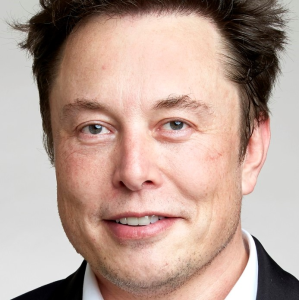

,feature,predictions
8,Male,0.754786
9,White,0.629519
0,0-25,0.491585
2,45-116,0.306863
1,25-45,0.283240
5,Female,0.243656
4,Black,0.212003
7,Latin,0.152164
3,Asian,0.129596
6,Hindu,0.028781


In [141]:
display_and_predict('/content/Elon_Musk.jpg')

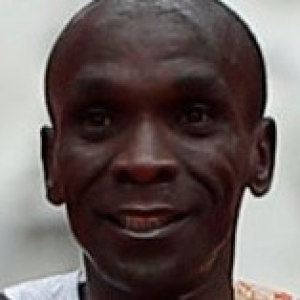

,feature,predictions
4,Black,0.979123
8,Male,0.762988
2,45-116,0.610620
1,25-45,0.462172
5,Female,0.253848
6,Hindu,0.059528
9,White,0.033781
0,0-25,0.021266
3,Asian,0.006246
7,Latin,0.004553


In [135]:
display_and_predict('/content/eliud_kipchoge.jpg')

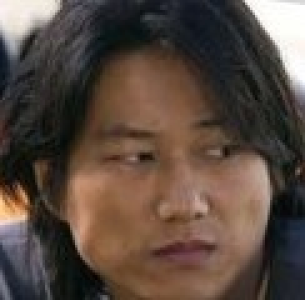

,feature,predictions
5,Female,0.966085
9,White,0.873204
2,45-116,0.464269
1,25-45,0.282615
4,Black,0.197832
0,0-25,0.188012
7,Latin,0.060345
8,Male,0.032815
6,Hindu,0.019077
3,Asian,0.007448


In [136]:
display_and_predict("/content/fast_and_furious.jpg")

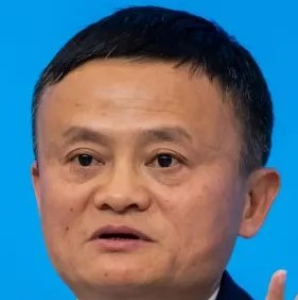

,feature,predictions
8,Male,0.867993
9,White,0.691799
1,25-45,0.544786
4,Black,0.429405
2,45-116,0.389543
0,0-25,0.172855
5,Female,0.137122
3,Asian,0.090996
7,Latin,0.055633
6,Hindu,0.008359


In [137]:
display_and_predict("/content/jack_ma.jpg")

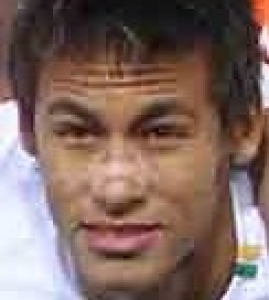

,feature,predictions
8,Male,0.878110
4,Black,0.864912
1,25-45,0.351397
0,0-25,0.320995
2,45-116,0.304491
5,Female,0.122781
9,White,0.110337
6,Hindu,0.055754
7,Latin,0.032647
3,Asian,0.032439


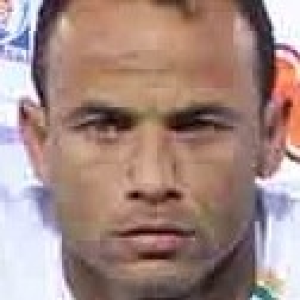

,feature,predictions
8,Male,0.932036
0,0-25,0.644240
4,Black,0.617618
1,25-45,0.282109
9,White,0.269575
7,Latin,0.092315
2,45-116,0.078478
5,Female,0.070504
3,Asian,0.032101
6,Hindu,0.030859


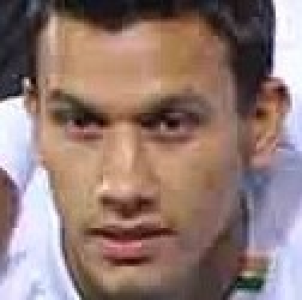

,feature,predictions
8,Male,0.971221
0,0-25,0.475949
9,White,0.429633
1,25-45,0.418956
4,Black,0.300556
7,Latin,0.120684
2,45-116,0.084280
3,Asian,0.075040
6,Hindu,0.037759
5,Female,0.027680


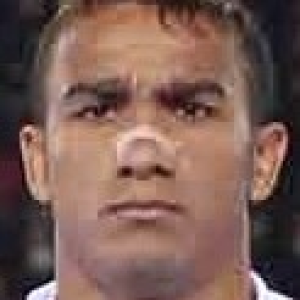

,feature,predictions
8,Male,0.836690
0,0-25,0.614309
9,White,0.485445
2,45-116,0.231520
1,25-45,0.191134
4,Black,0.174284
5,Female,0.156667
6,Hindu,0.103034
7,Latin,0.082660
3,Asian,0.063779


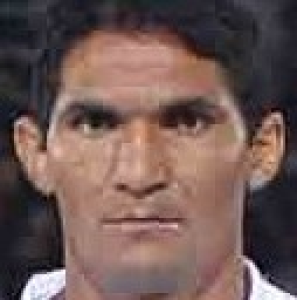

,feature,predictions
8,Male,0.785526
9,White,0.495036
0,0-25,0.443175
2,45-116,0.438810
4,Black,0.288764
5,Female,0.211643
3,Asian,0.199549
1,25-45,0.193948
7,Latin,0.095613
6,Hindu,0.013637


In [140]:
paths = ["/content/latin_guy_1.jpg", "/content/latin_guy_2.jpg", "/content/latin_guy_3.jpg", "/content/latin_guy_4.jpg", "/content/latin_guy_5.jpg"]
for path in paths:
  display_and_predict(path)

In [ ]:
# import numpy as np
# from matplotlib import pyplot as plt
# from keras.utils import to_categorical
# import tensorflow as tf


# print('Training data shape : ', X_train.shape, y_train.shape) 
# print('Testing data shape : ', X_test.shape, y_test.shape)

# # Find the unique numbers from the train labels
# classes = np.unique(y_train)
# classes_num = len(classes)
# print('Total number of outputs : ', classes_num) 
# print('Output classes : ', classes)
# plt.figure(figsize=[10,5])

# # Display the first image in training data
# plt.subplot(121)
# plt.imshow(X_train[0,:,:], cmap='copper') 
# #plt.title("Ground Truth : {}".format(y_train[0]))

# # Display the first image in testing data
# plt.subplot(122)
# plt.imshow(X_test[0,:,:], cmap='copper') 
# #plt.title("Ground Truth : {}".format(y_test[0]))

In [ ]:
# # 0-255 to 0-1
# X_train = X_train/255 
# X_test = X_test/255

# # Change the labels from integer to categorical data
# train_y_one_hot = tf.keras.utils.to_categorical(y_train) 
# test_y_one_hot = tf.keras.utils.to_categorical(y_test)

In [ ]:
#from keras.optimizers import RMSprop
#!pip install tensorflow==2.3.0
#!pip install keras==2.4.0

In [ ]:
#definicja modelu CNN
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same", input_shape=(48, 48, 1)))
# model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
# model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
# model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())
# model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
# model.add(Dense(3, activation="sigmoid"))

# # compile model
# opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# # fit model
# history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), verbose=1)